<a href="https://colab.research.google.com/github/arqMedes/PDS/blob/main/Analise_DT/01_Encontro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise no Domínio do Tempo de Sistemas em Tempo Discreto

## Sinal Discreto

![](https://github.com/arqMedes/images/blob/main/Figura3-2.png?raw=true)

## Tamanho de um Sinal em DT

Energia

$E=\sum_{n=-\infty}^{\infty}|x[n]|^2$

Potência

$P=\frac{1}{2N+1}\sum_{n=-N}^N|x[n]|^2$, onde N é o número de amostras

## Operações Úteis em TD (DT)

![](https://github.com/arqMedes/images/blob/main/Figura3-4.png?raw=true)



##  Alguns modelos de Sinais em tempo discreto Importantes



*   Impulso Unitário $\delta{[n]}$
*  Degrau Unitário $u{[n]}$
*  Exponencial  $\gamma^n$
* Senóide $cos(Ωn + Θ)$
* Exponencial Complexa $e^{jΩn }$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

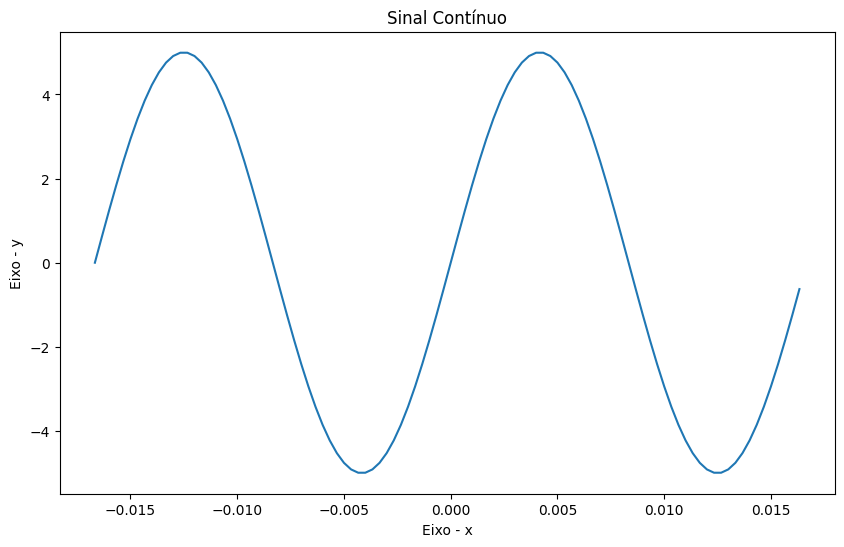

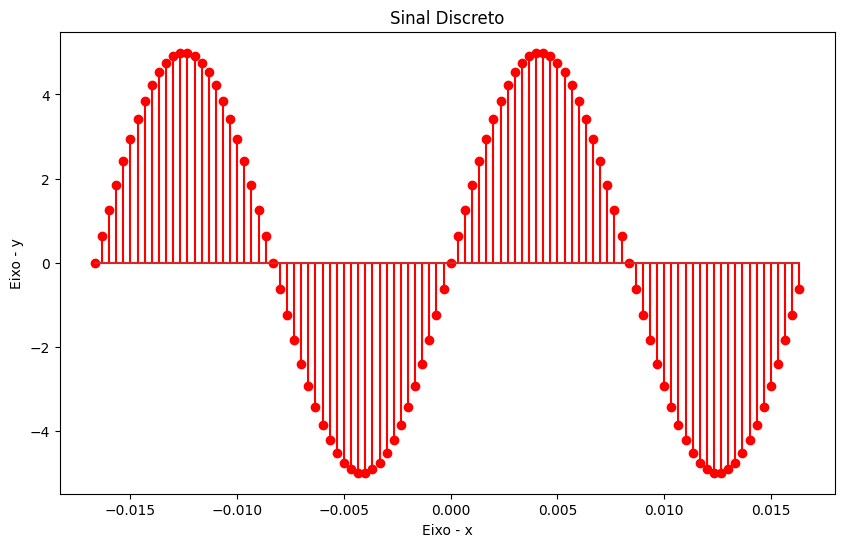

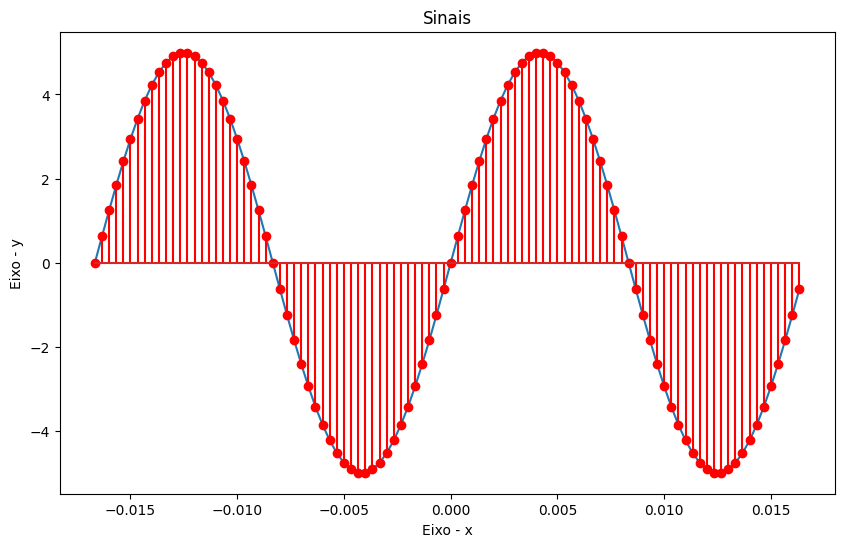

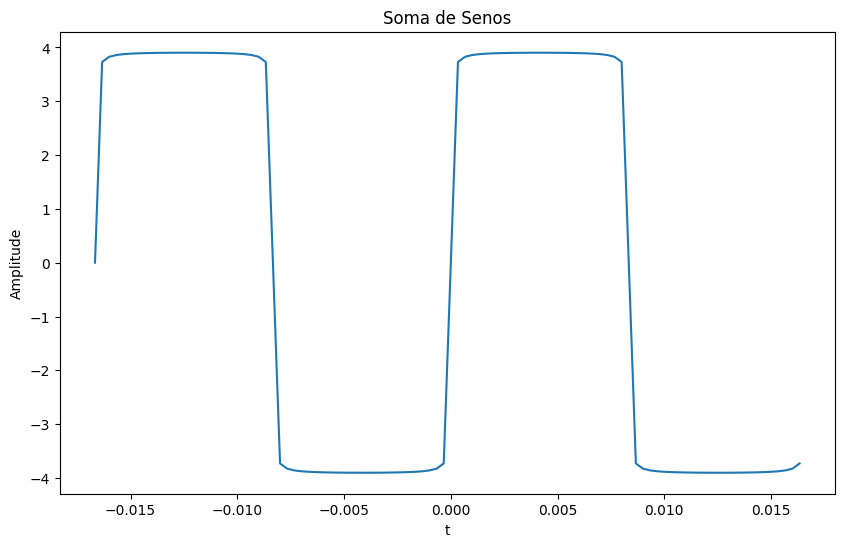

In [ ]:
# ------------------------------------
# Processamento Digital de Sinais IFG
# Arquimedes
# ----------------------------------

'''
 G R Á F I C O S

    * Senoide

    * soma de senoides

    * Impulso

    * Degrau

'''
# Set the default figure size
plt.rcParams['figure.figsize'] = [10, 6]  # Width, Height in inches


f = 60

# Base de Tempo contínua n pontos
wn_points = np.arange(-50, 50) # em milisegundos
wn = np.pi/25*wn_points

fs = 2*f

w= 2*np.pi*f
n = 1/w*wn
A = 5

y =A*np.sin(wn)

# Sinal Contínuo
plt.plot(n, y)
plt.title('Sinal Contínuo')
plt.xlabel('Eixo - x')
plt.ylabel('Eixo - y')
plt.show()

#Sinal Discreto
plt.stem(n, y, 'r')
plt.title('Sinal Discreto')
plt.xlabel('Eixo - x')
plt.ylabel('Eixo - y')
plt.show()

# Sinais Juntos
plt.plot(n, y)
plt.stem(n, y, 'r')
plt.title('Sinais')
plt.xlabel('Eixo - x')
plt.ylabel('Eixo - y')
plt.show()

sinal = 0
nTermos = 50
for i in range(1,2*nTermos,2):
    sinal = A/i*np.sin(i*w*n) + sinal

plt.plot(n, sinal)
plt.title('Soma de Senos')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
'''
def impulso(tempo):
    y = np.zeros(tempo.shape)
    y[tempo == 0] = 1
    return y

def degrau(tempo):
    y = np.zeros(tempo.shape)
    y[tempo >= 0] = 1
    return y
'''
def impulso(n):
    return (n==0)*1.

def degrau(n):
    return (n>=0)*1.



In [ ]:
def rampa(n):
  return n*degrau(n)

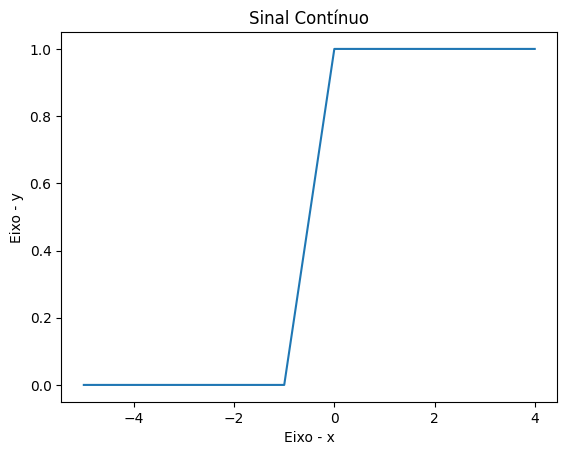

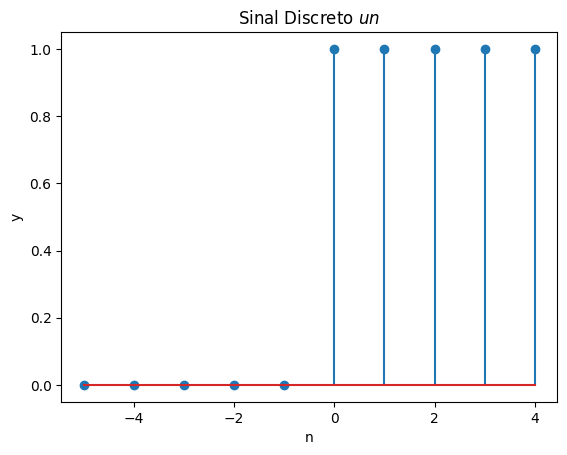

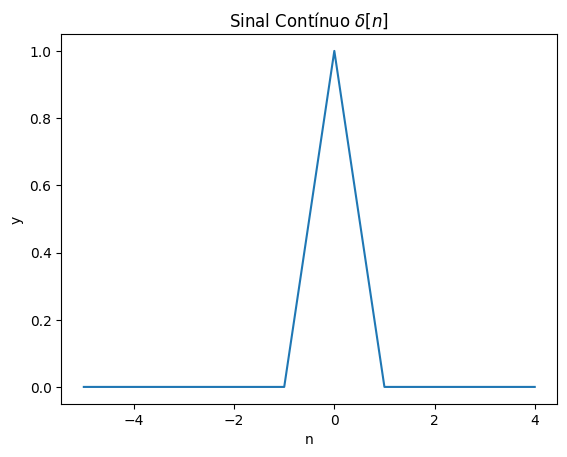

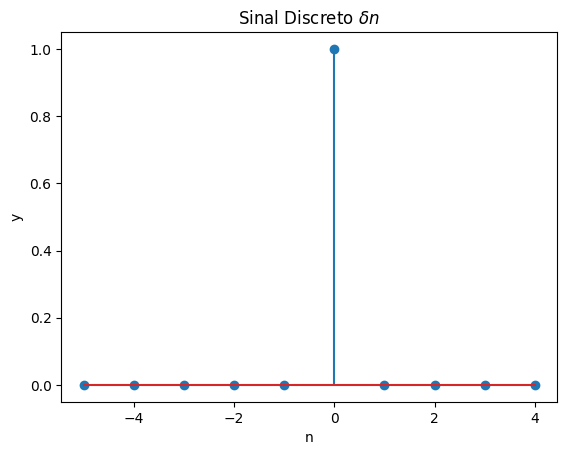

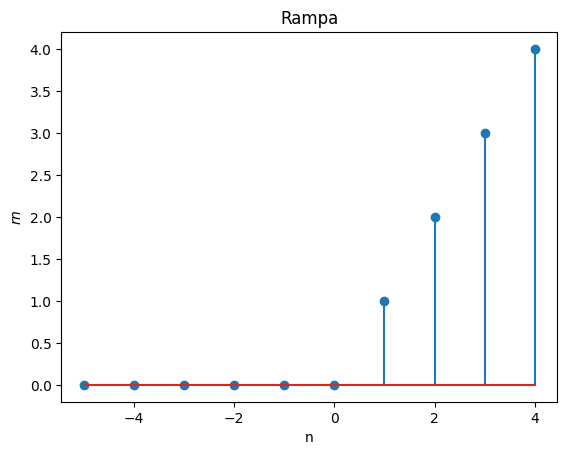

In [ ]:
n = np.arange(-5, 5)
# Sinal Contínuo
y= degrau(n)
plt.plot(n, y)
plt.title('Sinal Contínuo')
plt.xlabel('Eixo - x')
plt.ylabel('Eixo - y')
plt.show()

# Sinal Discreto

plt.stem(n, y)
plt.title('Sinal Discreto $u{n}$')
plt.xlabel('n')
plt.ylabel('y')
plt.show()

y = impulso(n)
plt.plot(n, y)
plt.title('Sinal Contínuo $\delta{ [n ] }$')
plt.xlabel('n')
plt.ylabel('y')
plt.show()


plt.stem(n, y)
plt.title('Sinal Discreto $\delta{n}$')
plt.xlabel('n')
plt.ylabel('y')
plt.show()

r = rampa(n)
plt.stem(n, r)
plt.title('Rampa')
plt.xlabel('n')
plt.ylabel('$r{n}$')
plt.show()

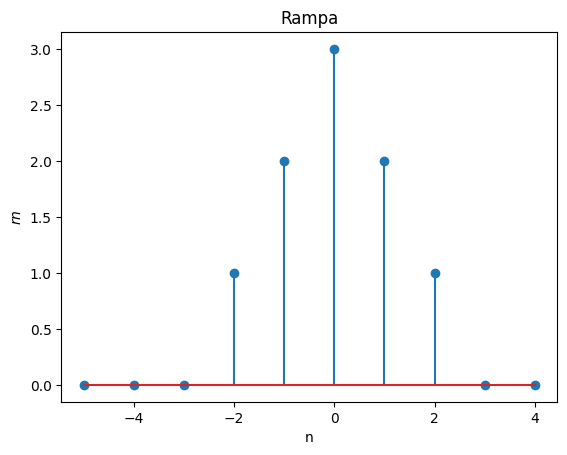

In [ ]:
# rampa deslocada de -3 e limitada à 0
n = np.arange(-5, 5)
r1 = rampa(n + 3)*(degrau(n+3)- degrau(n))
r2 = rampa(-n + 3)*(degrau(n)- degrau(n-4))
plt.stem(n, r1+ r2)
plt.title('Rampa')
plt.xlabel('n')
plt.ylabel('$r{n}$')
plt.show()

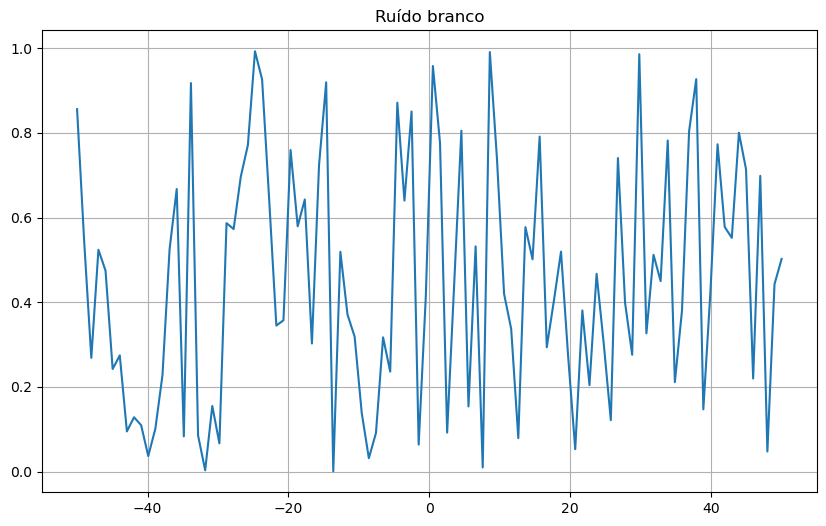

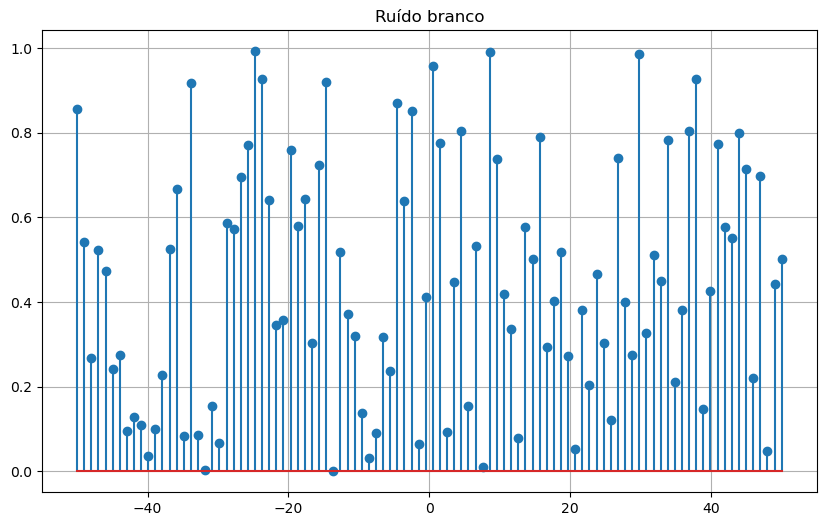

In [ ]:
#  Ruído branco

t =np.linspace(-50, 50, 100) # base de tempo


x=np.random.rand(100,1)

# Exibe os gráficos "contínuos" e discretos
plt.grid(True)
plt.plot(t,x)
plt.title('Ruído branco')
plt.show()

plt.grid(True)
plt.stem(t, x)
plt.title('Ruído branco')
plt.show()

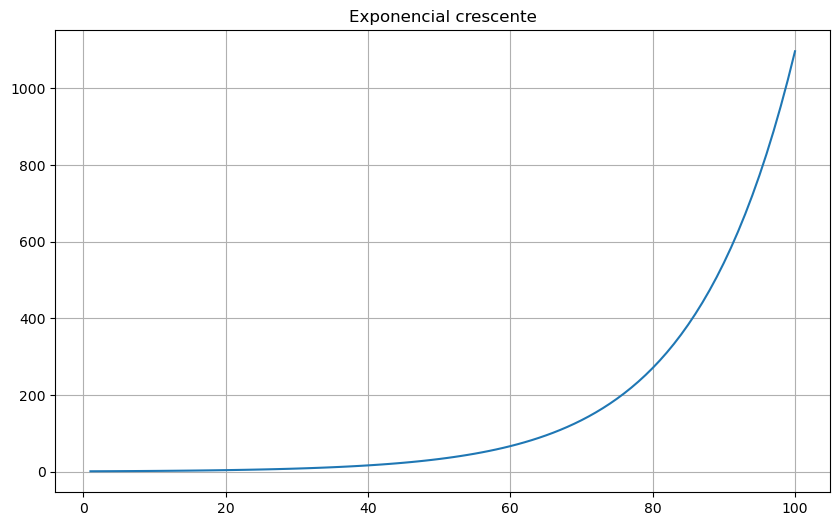

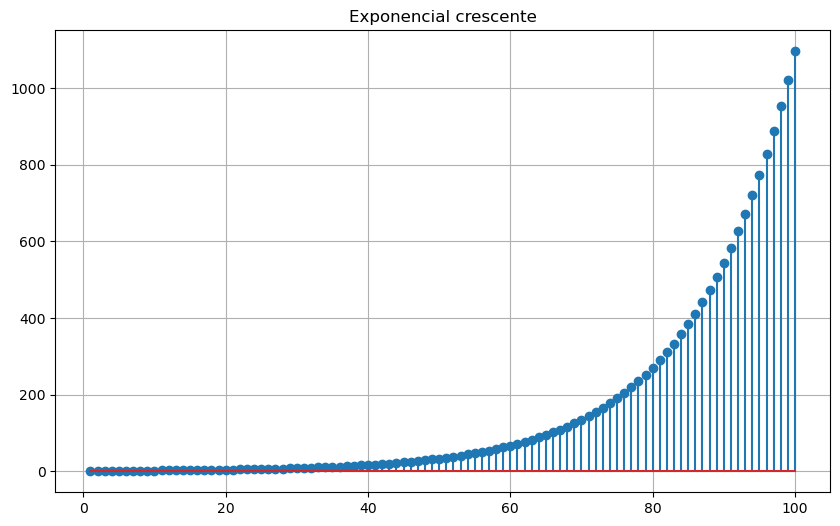

In [ ]:
# 1.k) Exponencial crescente

# Cria um vetor de 100 pontos igualmente espaçados
x = np.linspace(1,100,100)

# Cria uma exponencial crescente
y = np.exp(0.07*x)

# Imprime os gráficos "contínuos" e discretos
plt.grid(True)
plt.plot(x,y)
plt.title('Exponencial crescente')
plt.show()

plt.grid(True)
plt.stem(x, y)
plt.title('Exponencial crescente')
plt.show()

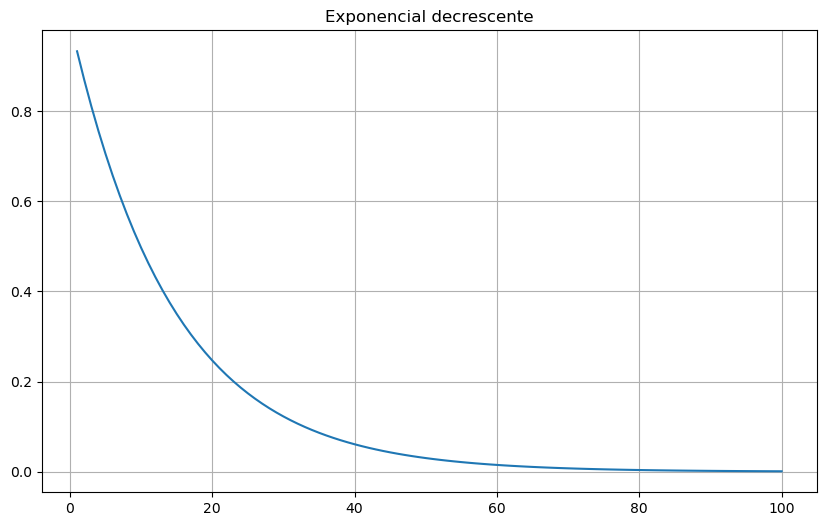

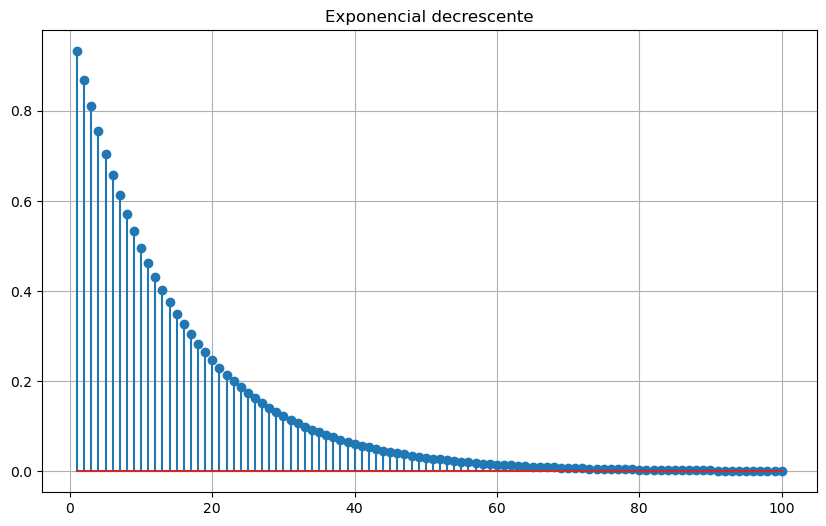

In [ ]:
# 1.l) Exponencial decrescente

# Cria um vetor de 100 pontos igualmente espaçados
x = np.linspace(1,100,100)

# Cria uma exponencial decrescente
y = np.exp(-0.07*x)

# Imprime os gráficos "contínuos" e discretos
plt.grid(True)
plt.plot(x,y)
plt.title('Exponencial decrescente')
plt.show()

plt.grid(True)
plt.stem(x, y)
plt.title('Exponencial decrescente')
plt.show()

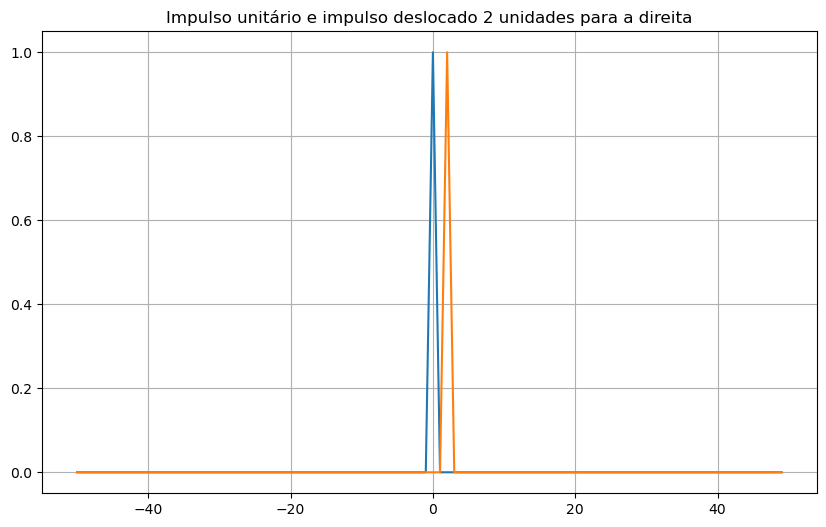

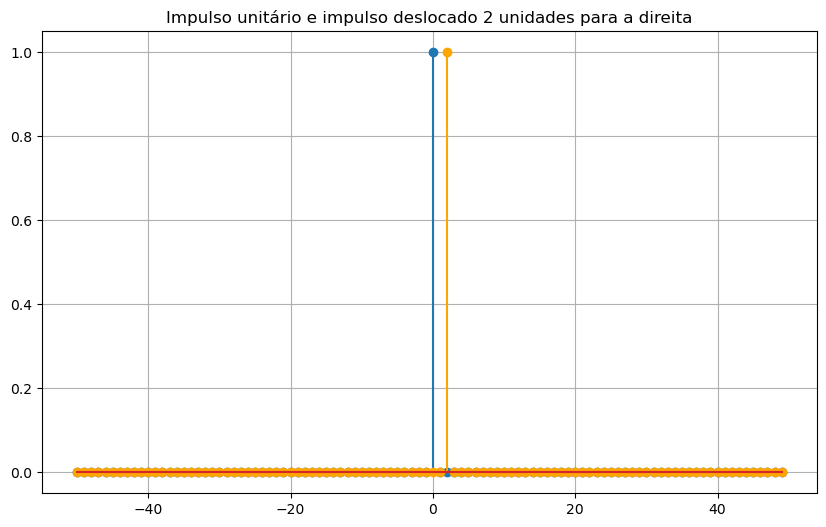

In [ ]:
# 2) Operações
# 2.a) Deslocar o impulso unitario (a) duas unidades para a direita.
# Plotar impulso original e impulso deslocado em cores diferentes.

# Cria vetores de 100 zeros cada
y=np.zeros(100)
y_deslocado = np.zeros(100)

# Cria um vetor de 100 pontos igualmente espaçados
x=np.linspace(-50, 49, 100)

# Atribui o valor 1 ao elemento central do vetor y,
# representando um impulso unitário
y[50] = 1

# Atribui o valor correspondente ao impulso do vetor y no
# vetor y_deslocado, porém dois elementos a direita
y_deslocado[50+2] = y[50]

# Imprime os gráficos "contínuos" e discretos
plt.grid(True)
plt.plot(x,y,x,y_deslocado)
plt.title('Impulso unitário e impulso deslocado 2 unidades para a direita')
plt.show()

plt.grid(True)
plt.stem(x, y)
plt.stem(x, y_deslocado,'orange')
plt.title('Impulso unitário e impulso deslocado 2 unidades para a direita')
plt.show()

https://github.com/barbosaleo98/Processamento_Digital_Sinais_UFPR


https://fei.edu.br/~isanches/verao/curso_de_verao_2017.html



<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Root\AppData\Local\Temp\ipykernel_9828\2319169584.py:10: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Sinal Contínuo $\delta{ [n ] }$')
C:\Users\Root\AppData\Local\Temp\ipykernel_9828\2319169584.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Sinal Discreto $\delta{n}$')
C:\Users\Root\AppData\Local\Temp\ipykernel_9828\2319169584.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Sinal Discreto $\delta{n}$')


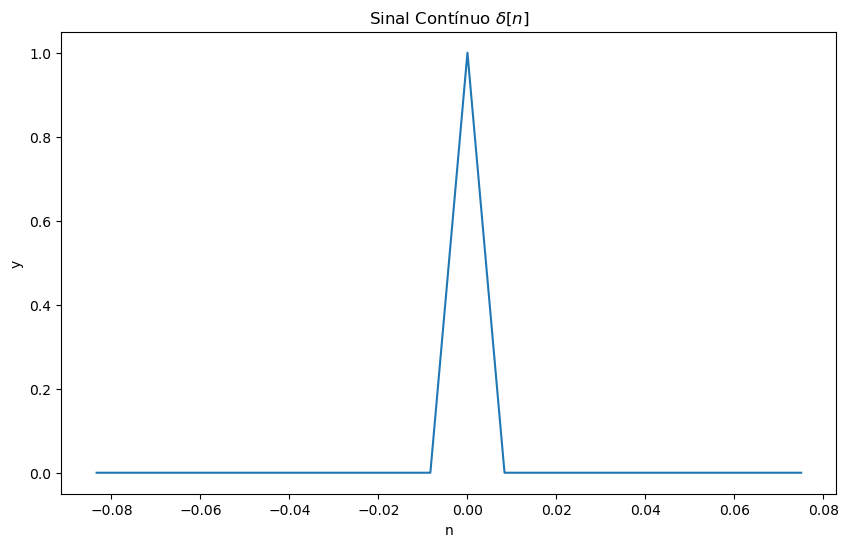

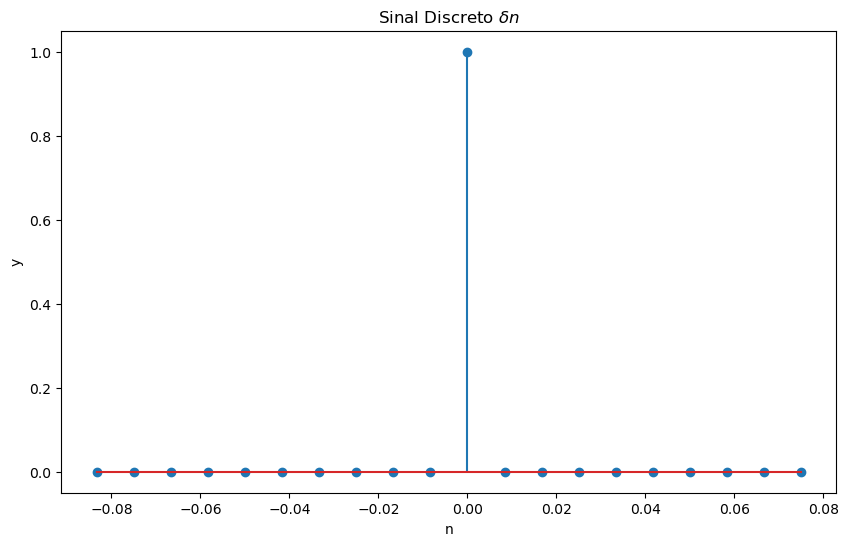

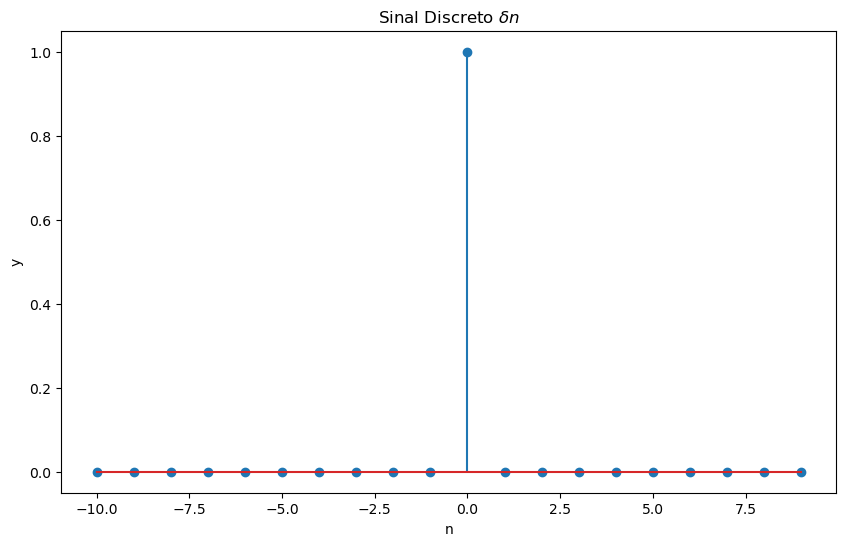

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_pnts= np.arange(-10,10)
fs = 120
dT = 1/fs
n = dT*n_pnts
y = impulso(n)
plt.plot(n, y)
plt.title('Sinal Contínuo $\delta{ [n ] }$')
plt.xlabel('n')
plt.ylabel('y')
plt.show()

plt.stem(n, y)
plt.title('Sinal Discreto $\delta{n}$')
plt.xlabel('n')
plt.ylabel('y')
plt.show()

plt.stem(n_pnts, y)
plt.title('Sinal Discreto $\delta{n}$')
plt.xlabel('n')
plt.ylabel('y')
plt.show()

![](https://m.media-amazon.com/images/I/81WMbSEVjeL._AC_UF1000,1000_QL80_.jpg)